In [ ]:
#Importing Libraries 
import pandas as pd
import numpy as np

In [ ]:
#training data sets 
df_train = pd.read_csv("C:/Users/hp/Github/repos/Fake-New-Identification-Classification/dataset/train.csv")
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Data Pre-processing : removing empty or unlabeled data sets
print (df_train.shape)
df_train.dropna(subset=['label'], inplace=True)

df_train.label.unique()


(20800, 5)


array([1, 0], dtype=int64)

In [ ]:
#understanding the test data sets
df_test = pd.read_csv("C:/Users/hp/Github/repos/Fake-New-Identification-Classification/dataset/test.csv")
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
X = df_train.drop('label',axis=1)
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [ ]:
y=df_train['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df_train=df_train.dropna()

In [ ]:
Message = df_train.copy()
Message.reset_index(inplace=True)
Message.head()


,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(Message)):
    review = re.sub('[^a-zA-Z]', ' ', Message['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[13]

'major leagu soccer argentin find home success new york time'

In [ ]:
#count vectorizer and bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


In [ ]:
cv.vocabulary_

{'hous': 2049,
 'dem': 1103,
 'aid': 89,
 'even': 1453,
 'see': 3868,
 'comey': 820,
 'letter': 2457,
 'jason': 2241,
 'chaffetz': 645,
 'tweet': 4613,
 'comey letter': 822,
 'jason chaffetz': 2242,
 'flynn': 1665,
 'hillari': 1985,
 'clinton': 751,
 'big': 396,
 'woman': 4916,
 'campu': 574,
 'breitbart': 489,
 'hillari clinton': 1987,
 'campu breitbart': 575,
 'truth': 4598,
 'might': 2698,
 'get': 1789,
 'fire': 1627,
 'civilian': 734,
 'kill': 2334,
 'singl': 3982,
 'us': 4671,
 'airstrik': 98,
 'identifi': 2086,
 'us airstrik': 4672,
 'iranian': 2196,
 'jail': 2230,
 'fiction': 1596,
 'stori': 4167,
 'stone': 4164,
 'death': 1064,
 'jacki': 2228,
 'mason': 2611,
 'hollywood': 2020,
 'would': 4945,
 'love': 2534,
 'trump': 4503,
 'bomb': 451,
 'north': 2949,
 'korea': 2359,
 'lack': 2378,
 'tran': 4459,
 'bathroom': 340,
 'exclus': 1472,
 'video': 4720,
 'north korea': 2952,
 'win': 4894,
 'french': 1726,
 'socialist': 4033,
 'parti': 3138,
 'presidenti': 3366,
 'nomin': 2945,
 'ne

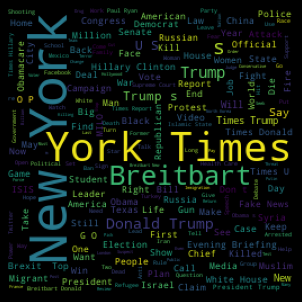

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

real=' '.join(list(Message[Message['label']==0]['title']))
real=WordCloud(width=256, height=256).generate(real)
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



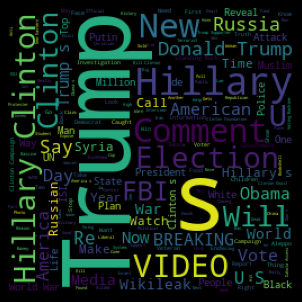

In [ ]:
fake=' '.join(list(Message[Message['label']==1]['title']))
fake=WordCloud(width=256, height=256).generate(fake)
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
cv.get_feature_names()[:30]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag']

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

df_train = df_train.fillna('')
df_test = df_test.fillna('')

df_train['all_text'] = df_train['title']+' '+df_train['author'] + df_train['text']
df_test['all_text']=df_test['title']+' '+df_test['author'] + df_train['text']

#tfidf
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df_train['all_text'].values)
tfidf = transformer.fit_transform(counts)

In [ ]:
df_train=df_train.dropna()
df_train.head()

df_test=df_test.dropna()


In [ ]:
targets = df_train['label'].values
test_counts = count_vectorizer.transform(df_test['all_text'].values)
test_tfidf = transformer.fit_transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

D:\anaconda3\envs\Strive_AI\lib\site-packages\sklearn\feature_extraction\text.py:1453: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


Accuracy of Logistic Regression Classifier: 97.9%

Confusion Matrix of Logistic Regression Classifier:

[[2546   37]
 [  59 1930]]


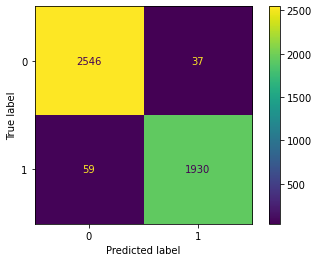


CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2583
           1       0.98      0.97      0.98      1989

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot

logreg = LogisticRegression(max_iter=1000,C=1e5,dual=False)

model_lr = logreg.fit(X_train, y_train)
lr_pred = model_lr.predict(X_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2)))
print("\nConfusion Matrices of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, lr_pred))
plot_confusion_matrix(model_lr, X_test, y_test)
plt.show()
print("\nCLassification F1/Precision/Recall of Logistic Regression Classifier:\n")
print(classification_report(y_test, lr_pred))


In [ ]:
targets = df_train['label'].values
logreg = LogisticRegression(max_iter=1000,dual=False)
logreg.fit(counts, targets)

example_counts = count_vectorizer.transform(df_test['all_text'].values)
predictions = logreg.predict(example_counts)
pred=pd.DataFrame(predictions,columns=['label'])
pred['id']=df_test['id']
pred.groupby('label').count()

,id
label,
0,2245
1,1737


Accuracy of SVM Classifier: 97.64%

Confusion Matrix of SVM Classifier:

[[2542   41]
 [  67 1922]]


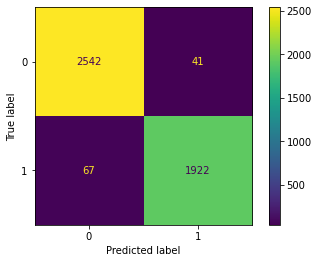


Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2583
           1       0.98      0.97      0.97      1989

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



In [ ]:
#Support Vector classification
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

svc = LinearSVC(random_state=0, tol=1e-5)
model_svc = svc.fit(X_train, y_train)
svc_pred = model_svc.predict(X_test)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))
print("\nConfusion Matrices of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))
plot_confusion_matrix(model_svc, X_test, y_test)
plt.show()
print("\nClassification F1/Precision/Recall Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))

In [ ]:
# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 


SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)



# List of pipelines for iterating through each of them
grids = [LR,SVM]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Support Vector Machine'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(x_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(x_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
dump_file = 'best_grid_search_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))